In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [ ]:
ruta = r"C:\Users\analista.datos\Documents\Universidad\Machine learning\miniproyecto_s10\data\raw\heart.csv"
df = pd.read_csv(ruta)

In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Attribute Information
1. Age: age of the patient [years] 

2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['HeartDisease'] = df['HeartDisease'].map({0: 'No Enfermedad', 1: 'Enfermedad'})
df['FastingBS'] = df['FastingBS'].astype('object')


In [ ]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])


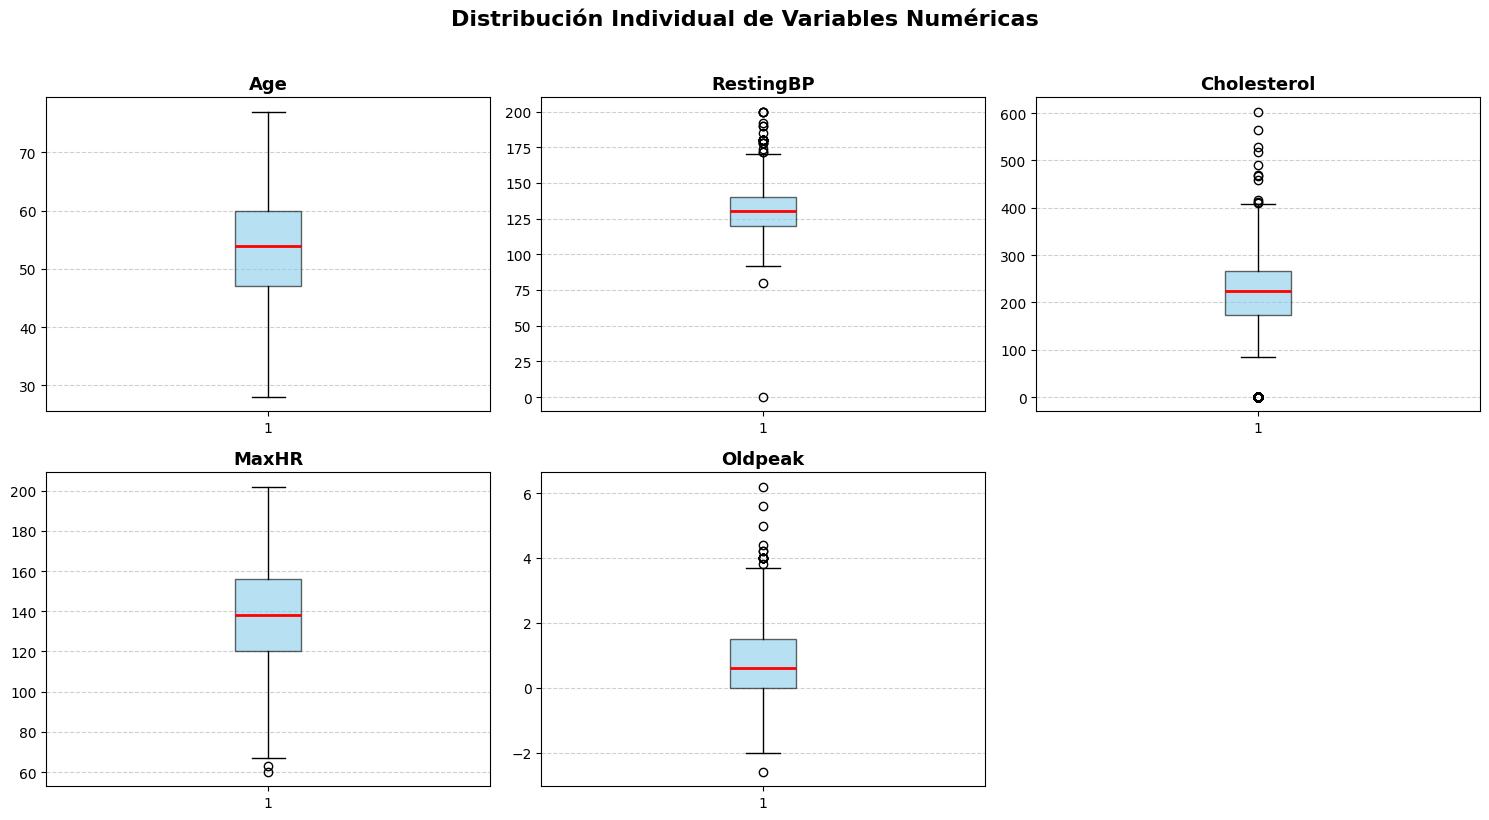

In [ ]:
plt.style.use('seaborn-v0_8-muted')

# --- Crear subplots dinámicos ---
num_cols = df_num.columns
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n + 2)//3, ncols=3, figsize=(15, 4*((n + 2)//3)))
axes = axes.flatten()

# --- Dibujar un boxplot por variable ---
for i, col in enumerate(num_cols):
    axes[i].boxplot(df_num[col].dropna(),
                    patch_artist=True,
                    boxprops=dict(facecolor='#87CEEB', color='black', alpha=0.6),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# --- Ocultar subplots vacíos ---
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución Individual de Variables Numéricas", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

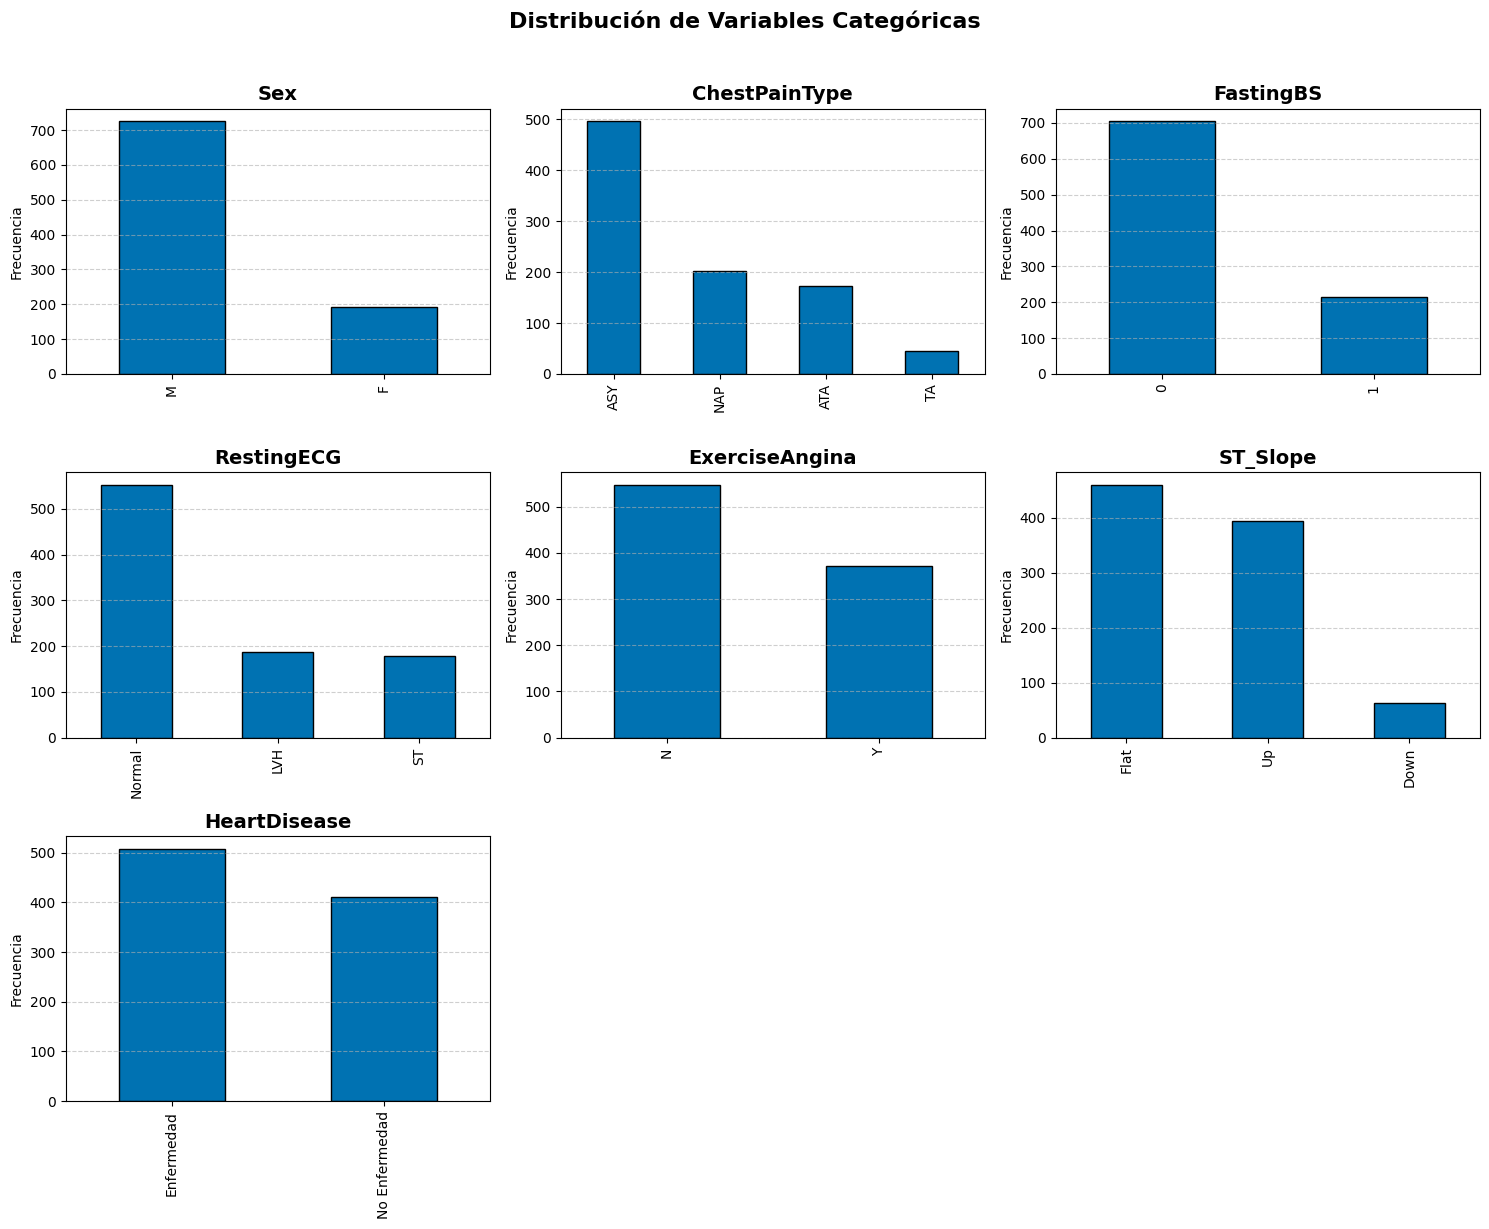

In [ ]:
# --- Configuración del estilo ---
plt.style.use('seaborn-v0_8-colorblind')

# --- Crear subplots dinámicamente según la cantidad de columnas ---
n_cat = len(df_cat.columns)
fig, axes = plt.subplots(nrows=(n_cat + 2)//3, ncols=3, figsize=(15, 4*((n_cat + 2)//3)))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    df_cat[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Ocultar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de Variables Categóricas", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


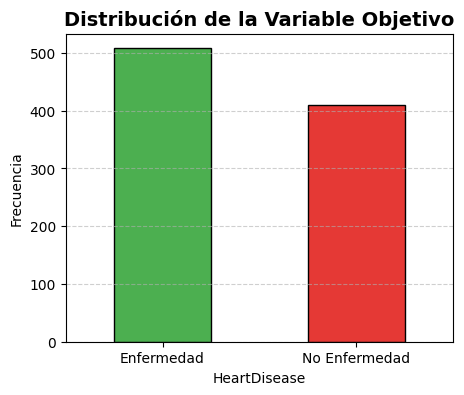

In [ ]:
plt.figure(figsize=(5,4))
df['HeartDisease'].value_counts().plot(kind='bar', color=['#4CAF50', '#E53935'], edgecolor='black')
plt.title('Distribución de la Variable Objetivo', fontsize=14, fontweight='bold')
plt.xlabel('HeartDisease')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

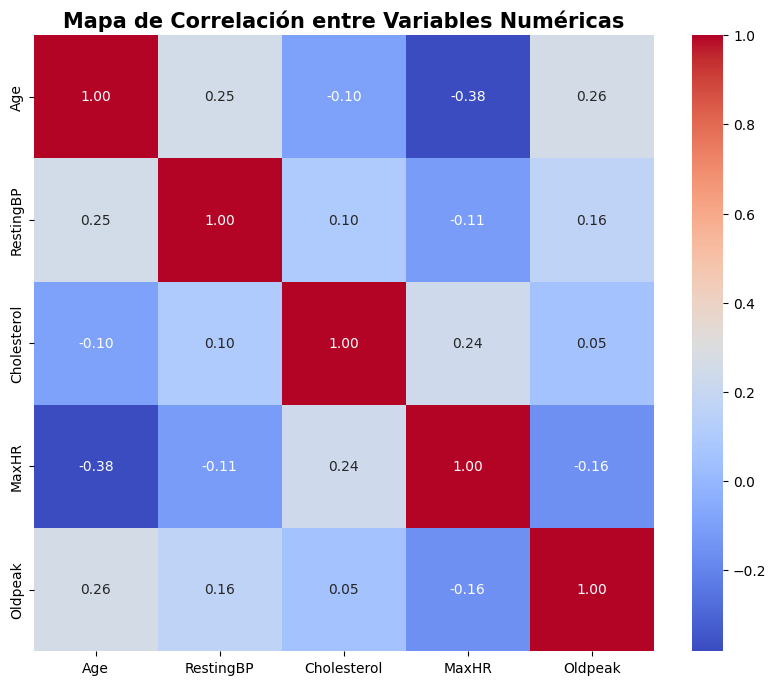

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación entre Variables Numéricas', fontsize=15, fontweight='bold')
plt.show()

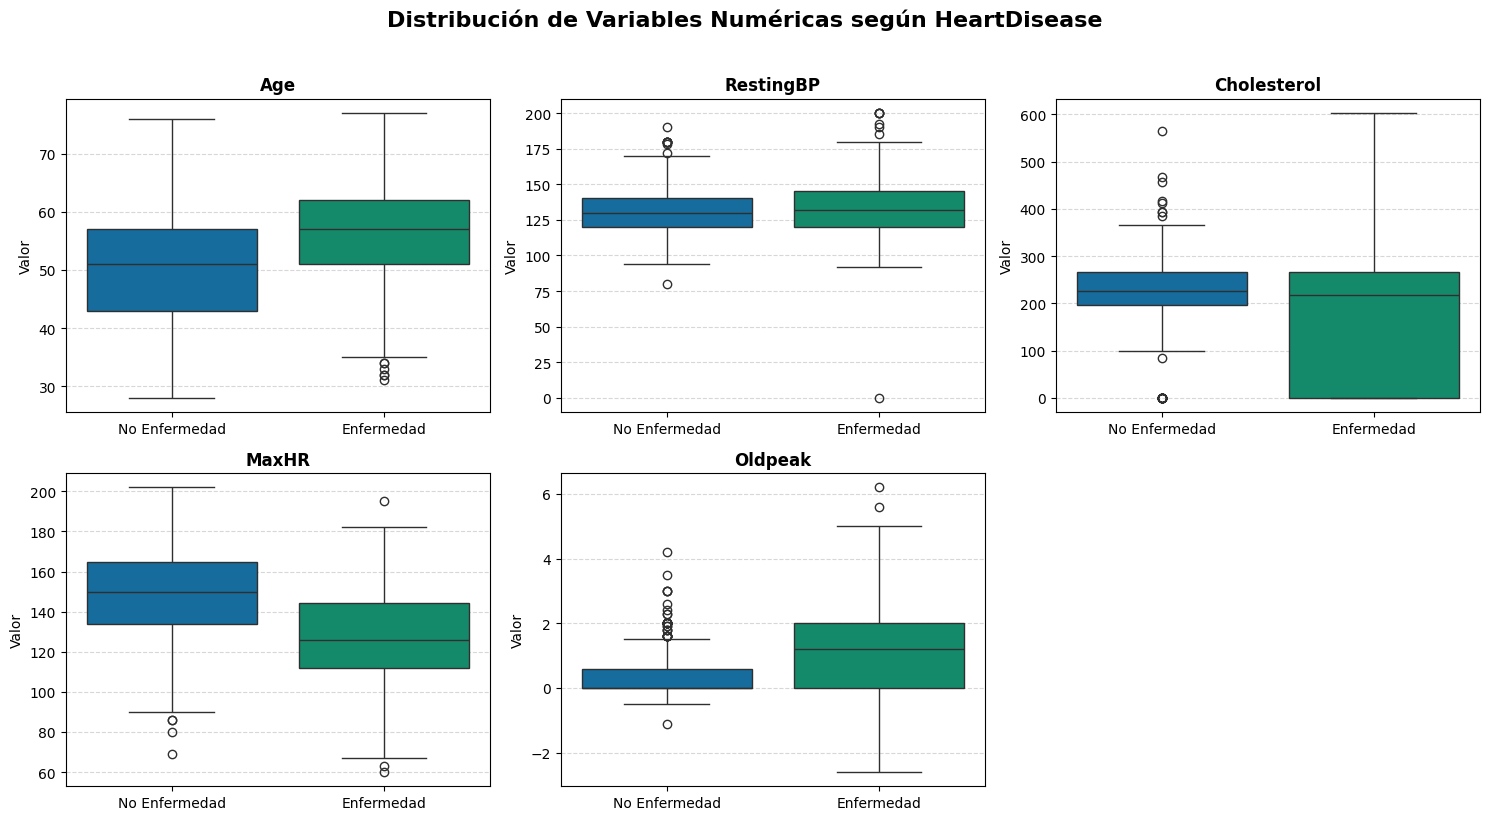

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Seleccionar solo columnas numéricas ---
num_cols = df.select_dtypes(include=['number']).columns

# --- Crear figura de subplots dinámicamente ---
fig, axes = plt.subplots(
    nrows=(len(num_cols)+2)//3, 
    ncols=3, 
    figsize=(15, 4*((len(num_cols)+2)//3))
)
axes = axes.flatten()

# --- Dibujar boxplots ---
for i, col in enumerate(num_cols):
    sns.boxplot(
        x='HeartDisease', 
        y=col, 
        data=df, 
        ax=axes[i], 
        hue='HeartDisease',
        legend=False
    )
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')  # limpia etiqueta x
    axes[i].set_ylabel('Valor', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# --- Ocultar subplots vacíos ---
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de Variables Numéricas según HeartDisease", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


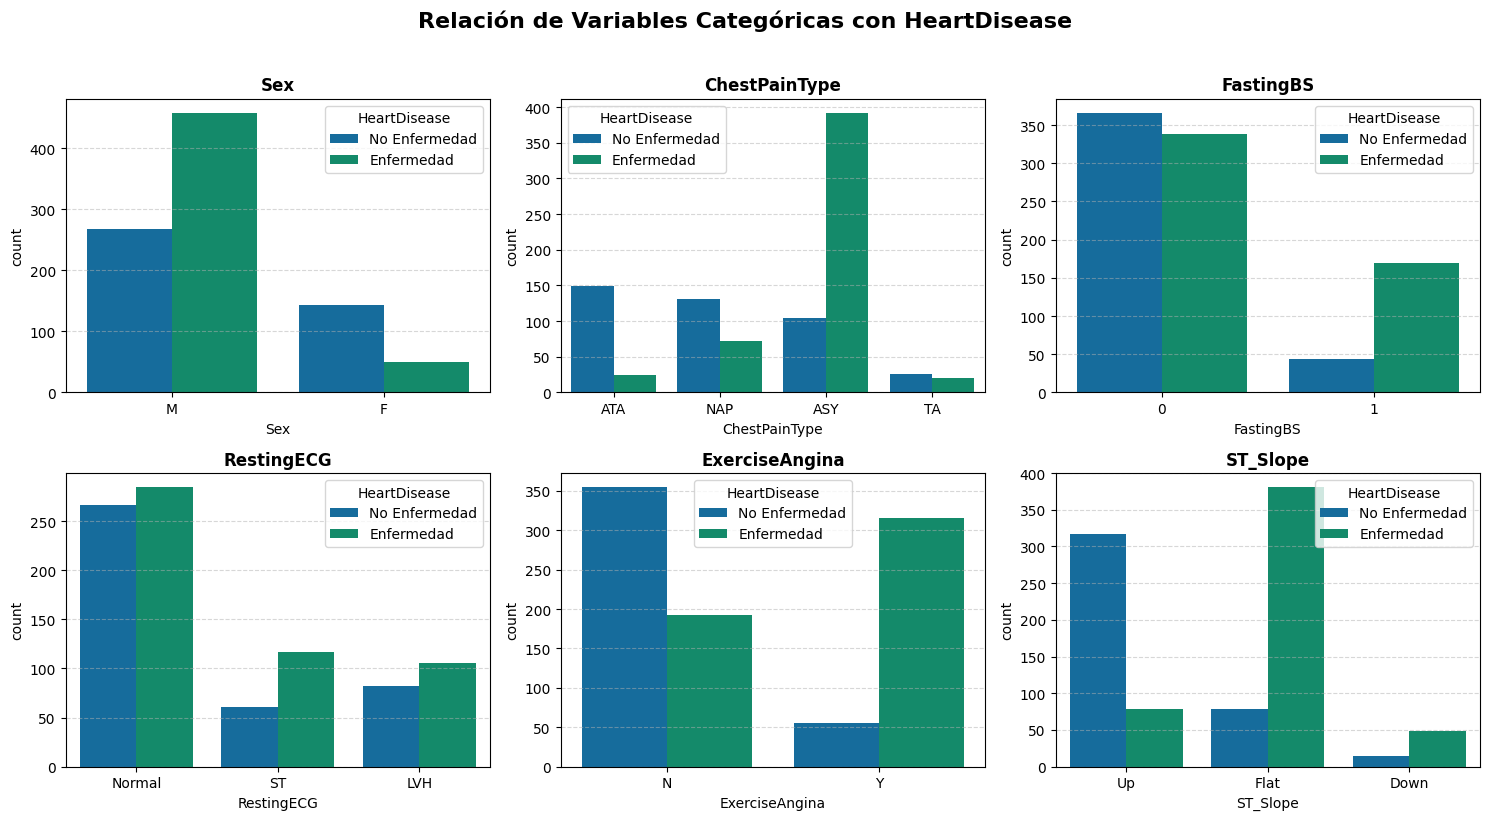

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.drop('HeartDisease')

fig, axes = plt.subplots(nrows=(len(cat_cols)+2)//3, ncols=3, figsize=(15, 4*((len(cat_cols)+2)//3)))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='HeartDisease', data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Relación de Variables Categóricas con HeartDisease", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
outliers = {}
for col in num_cols:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers[col] = ((df[col] < lower) | (df[col] > upper)).sum()

print(outliers)

{'Age': np.int64(0), 'RestingBP': np.int64(28), 'Cholesterol': np.int64(183), 'MaxHR': np.int64(2), 'Oldpeak': np.int64(16)}


In [15]:
rutaS = r"C:\Users\analista.datos\Documents\Universidad\Machine learning\miniproyecto_s10\data\cleaned\heart_cleaned.csv"
df.to_csv(rutaS, index=False)
